# Stock Price Prediction Using Machine Learning
### Project Overview
This project is part of my final submission for the Master of Science (MSc) degree in Computer Science. The primary objective of this project is to predict stock prices using machine learning models. By leveraging historical market data and employing various algorithms, the goal is to provide insights and forecasts that could be beneficial for investors and financial analysts.

## Importing Libraries

In this cell, we import the essential libraries required for our stock price prediction project:

- **pandas as pd**: For data manipulation and analysis. It provides data structures like DataFrames to handle and analyze structured data easily.
- **numpy as np**: For numerical computations and handling arrays. It is useful for mathematical functions and random number generation.
- **matplotlib.pyplot as plt**: For data visualization. It allows us to create static, animated, and interactive plots.
- **tensorflow as tf**: For building and training machine learning models, particularly useful for deep learning.
- **yfinance as yf**: For fetching historical stock price data from Yahoo Finance.

The `%matplotlib inline` command is used to display Matplotlib plots directly within the Jupyter Notebook, making it easier to visualize the data and results.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline


## Data Collection and Preparation

This cell is responsible for loading the historical NASDAQ Composite Index data, which has been manually downloaded from Bloomberg and saved locally in the `Data` directory. The data covers the period from 2014 through 2023, providing a decade of financial information for analysis
.


## About NASDAQ Composite
he Nasdaq Composite® is a unique exchange-based index encompassing all companies listed on the Nasdaq Stock Market®. It distinguishes itself by not imposing restrictions related to size, sector classification, liquidity, geography, or float. Instead, the sole requirement for inclusion is a Nasdaq listing, resulting in an impressive portfolio of approximately 3,500 stocks that span a diverse range of countries, sectors, and sizes, and boasts a total market cap of $22.4T.


In [2]:
# Define the directory and file name
directory = 'Data'
file_name = 'XCMP.xlsx'

# Combine the directory and file name into a full path
file_path = os.path.join(directory, file_name)

# Read the Excel file into a DataFrame
XCMP_data = pd.read_excel(file_path)

# Convert to datetime if not already
XCMP_data['Date'] = pd.to_datetime(XCMP_data['Date'])  

# Set 'Date' column as the index
XCMP_data.set_index('Date', inplace=True)       


# Exploring and Understanding the Dataset

Before proceeding with data cleaning and preparation, it's essential to understand the structure and content of our NASDAQ Composite Index dataset. This section uses Pandas functions to:

- **View the first few rows** of the data to get an initial overview of the available columns and their values.
- **Check the data types and non-null counts** to ensure all columns have the expected types and to identify any missing values.
- **Identify missing data** by calculating the number of null values in each column.
- **List the column names** to understand what parameters are included in the dataset.
- **Obtain basic statistical insights** such as mean, standard deviation, minimum, and maximum values for numerical columns to assess the data distribution.

These steps will provide a comprehensive understanding of the dataset, allowing us to make informed decisions about necessary data cleaning and preparation.


In [3]:
# Display the first few rows of the data to get an overview
print("First 5 rows of the dataset:")
print(XCMP_data.head())
print("\n" + "="*50 + "\n")  # Separator

# Get information about the dataset, including data types and non-null values
print("Dataset Information:")
print(XCMP_data.info())
print("\n" + "="*50 + "\n")  # Separator

# Check for any missing values in the dataset
print("Missing values in each column:")
print(XCMP_data.isnull().sum())
print("\n" + "="*50 + "\n")  # Separator

# Display the column names to see what parameters are available
print("Column names in the dataset:")
print(XCMP_data.columns)
print("\n" + "="*50 + "\n")  # Separator

# Get basic statistical details of the dataset
print("Statistical summary of numerical columns:")
print(XCMP_data.describe())


First 5 rows of the dataset:
               Open     High      Low     Volume  Adj Close
Date                                                       
2014-01-02  4563.58  4564.60  4532.60  446910020    4544.97
2014-01-03  4551.02  4555.85  4525.14  396555891    4532.75
2014-01-06  4538.40  4541.41  4501.88  537649195    4512.78
2014-01-07  4529.15  4561.64  4526.86  525550217    4556.15
2014-01-08  4557.42  4576.59  4547.24  560593013    4569.85


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2014-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Volume     2516 non-null   int64  
 4   Adj Close  2516 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 117.9 KB
None


Missing values in each column:
Open         0
High         0
Low 

### Dataset Columns Explanation

- **Date**: The specific day the data was recorded, formatted as YYYY-MM-DD.

- **Open**: The price of the stock at the beginning of the trading day.

- **High**: The highest price at which the stock traded during the trading day.

- **Low**: The lowest price at which the stock traded during the trading day.

- **Volume**: The total number of shares traded during the trading day, indicating the overall activity level of the stock.

- **Adj Close**: The stock's closing price after adjustments for all applicable splits and dividend distributions. This value is used to analyze historical stock returns and to compare the performance of different stocks.


# NASDAQ Composite Total Return Prices (2014 - 2023)

The following plot represents the **NASDAQ Composite Total Return Prices** from 2014 to 2024. The data includes the adjusted closing prices, which take into account corporate actions such as dividends and stock splits. The chart highlights the trend in NASDAQ's performance over this period, showcasing the upward movement as well as periods of volatility.

- **X-axis**: Date (Yearly from 2014 to 2024)
- **Y-axis**: Closing Price in USD
- **Line**: NASDAQ Adjusted Closing Prices

This visual representation helps in understanding how the NASDAQ Composite Index performed over time, reflecting market trends, growth, and periods of correction.


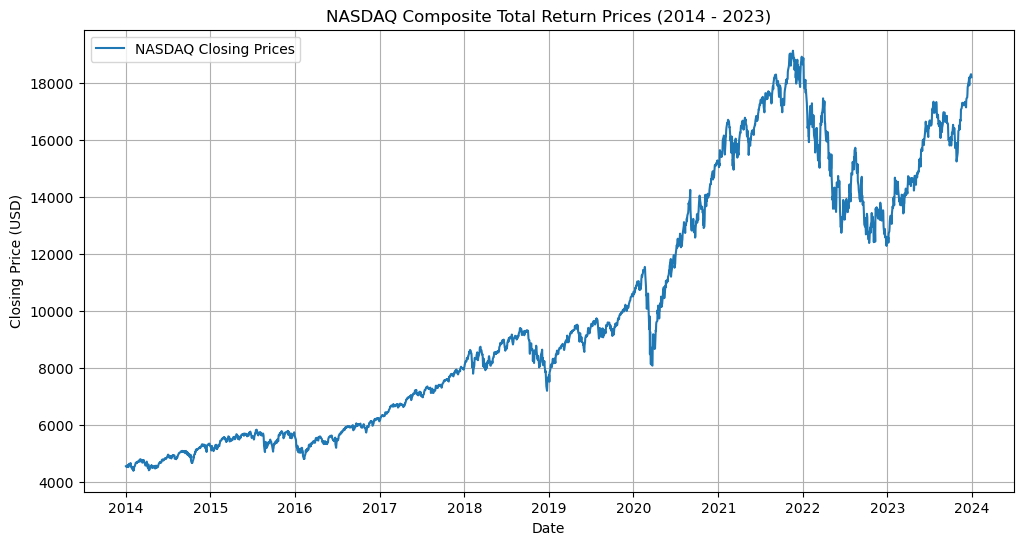

In [17]:
# Plotting the Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(XCMP_data.index, XCMP_data['Adj Close'], label='NASDAQ Closing Prices')
plt.title('NASDAQ Composite Total Return Prices (2014 - 2023)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

### Technical Indicators Overview

Below is a list of various technical indicators integrated with moving averages to predict market trend
s- **Open**: Opening price of the stock on a given trading day.

- **Close**: Closing price of the stock on the same trading day.
:

- **SMA (Simple Moving Average)**
  - Calculates the average of a selected range of prices, typically closing prices, over a defined number of periods, smoothing out price data.

- **MA (Moving Average, including Exponentially Weighted)**
  - Averages prices over a period, with variations like the Exponential Moving Average (EMA) that gives more weight to recent prices, making it more responsive to new information.

- **RSI (Relative Strength Index)**
  - A momentum oscillator that measures the speed and change of price movements, with levels identified at 70 (overbought) and 30 (oversold).

- **Stochastic Oscillator (Stochastic K)**
  - Compares a specific closing price of a security to its price range over a certain period, helping identify momentum changes.

- **MACD (Moving Average Convergence Divergence)**
  - A trend-following momentum indicator showing the relationship between two moving averages of a security's prices.

- **CCI (Commodity Channel Index)**
  - An oscillator that measures the variation of a security's price from its statistical mean, highlighting periods of overbought or oversold conditions.

- **ATR (Average True Range)**
  - Measures market volatility by decomposing the entire range of an asset price for that period.

- **Acc/Dist (Accumulation/Distribution Line)**
  - Measures the cumulative flow of money into and out of a security, indicating whether the stock is being accumulated or distributed.

- **Bollinger Bands**
  - Uses a moving average with two trading bands above and below it. Unlike a simple moving average, the bands widen during periods ofher volatility and narrow 
 .ty.
- **VIX (Volatility Index)**: Represents market'xpectation of 30-day volati
- lity.
- **USDX (U.S. Dollar Index)**: Measures the value of the U.S. dollar relatito a basket of foreign curre
  ncies.
- **EFFR (Effective Federal Funds Rate)**: The interest rate at which depository insttions trade federal funds ove
  rnight.
- **UNRATE (Unemployment Rate)**: The total number of unemped as a percentage of the labo
  r force.
- **UMCSENT (University of Michigan Consumer Sentiment Index)**: Measures consumer confidence regarding personal finances, business conditions, and purchasing power.
during less volatile periods.

Each indicator can help traders understand different aspects of market behavior and can be used in combination to make more informed trading decisions.


In [ ]:
def add_derived_features (df, ma_periods, ema_periods, momentum_periods, return_periods):
    """
    Enhance the dataframe with technical indicators.
    
    Parameters:
    df (DataFrame): Original dataframe with stock data.
    ma_periods (list): List of periods for calculating moving averages.
    ema_periods (list): List of periods for calculating exponential moving averages.
    momentum_periods (list): List of periods for calculating momentum.
    return_periods (list): List of periods for calculating returns.
    
    Returns:
    DataFrame: Enhanced dataframe with new technical indicators.
    """
    
    # Moving averages
    for period in ma_periods: 
        
        df[f'MA_{period}'] = df['Adj Close'].rolling(period).mean()

    # Exponential moving averages
    for period in ema_periods:
        df[f'EMA_{period}'] = df['Adj Close'].ewm(span=period, adjust=False).mean()
    
    # Stochastic Oscillator K
    df['Stochastic_k'] = (df['Close'] - df['Low'].rolling(window=14).min()) / \
                         (df['High'].rolling(window=14).max() - df['Low'].rolling(window=14).min()) * 100
    
    # Commodity Channel Index (CCI)
    TP = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (TP - TP.rolling(window=20).mean()) / (0.015 * TP.rolling(window=20).std())
    
    # Average True Range (ATR)
    df['ATR'] = df['H-L'].rolling(window=14).mean()
    
    # Accumulation/Distribution Index
    clv = ((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / (df['High'] - df['Low'])
    df['Acc/Dist'] = clv * df['Volume']
    
    # Returns for specified periods
    for period in return_periods:
        df[f'Return_{period}d'] = df['Adj Close'].pct_change(period)
    
    # Momentum for specified periods
    for period in momentum_periods:
        df[f'Momentum_{period}d'] = df['Adj Close'].diff(period)

    return df

# df = your_data_frame_here  # Assume this DataFrame is already loaded with the required columns
# ma_periods = [10, 20, 50]
# ema_periods = [10, 20, 50]
# momentum_periods = [1, 5, 10]
# return_periods = [1, 5, 10]
# enhanced_df = features(df, ma_periods, ema_periods, momentum_periods, return_periods)
